In [3]:
!pip install matplotlib

You should consider upgrading via the 'C:\Users\acer\Documents\pranav-msc\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [28]:
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [12]:
train_images.shape

(60000, 28, 28)

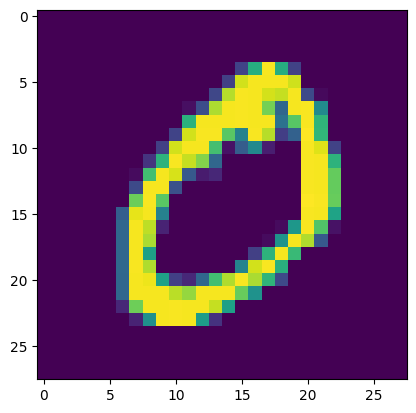

In [13]:
plt.imshow(train_images[1])

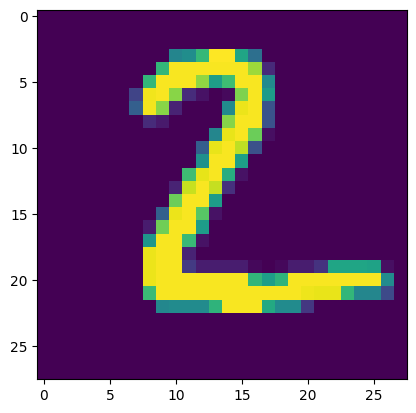

In [15]:
plt.imshow(test_images[1])

In [16]:
train_images, test_images = train_images/255.0, test_images/255.0

In [19]:
import numpy as np
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [20]:
from keras.utils import to_categorical

In [21]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
test_labels[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
cnnmodel = Sequential([Conv2D(32,(3,3),activation = "relu", input_shape=(28,28,1)), 
                      tf.keras.layers.MaxPooling2D(2,2),
                       Conv2D(64, (3,3), activation="relu"),
                       tf.keras.layers.Flatten(),
                       tf.keras.layers.Dense(10, activation = "softmax")
                      ])

In [32]:
cnnmodel.compile(optimizer="adam", loss = "categorical_crossentropy",metrics=["accuracy"] )

In [33]:
cnnmodel.fit(train_images, train_labels, epochs = 3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9082 - loss: 0.2940
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9843 - loss: 0.0496
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9904 - loss: 0.0315


In [34]:
predictions = cnnmodel.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [35]:
for i in range(3):
    print(predictions[i])
    print(test_labels[i])

[2.8625902e-10 3.3033284e-10 2.3235151e-08 3.0146273e-06 1.6518856e-12
 3.6654033e-10 7.0727185e-18 9.9999702e-01 8.8862834e-10 1.5184687e-08]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.3878649e-08 6.5525103e-07 9.9999845e-01 6.4207589e-10 4.3214758e-11
 1.3991990e-11 3.3765571e-07 2.3641451e-12 5.0200464e-07 5.1825245e-12]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[2.3225802e-07 9.9960750e-01 7.2097129e-05 9.5841949e-07 1.1772549e-04
 3.4221892e-05 9.5540654e-06 3.3309108e-05 1.2347824e-04 9.1285887e-07]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [36]:
cnnmodel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          77,450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 288,800 (1.10 MB)

 Trainable params: 96,266 (376.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 192,534 (752.09 KB)